# Object Detection: Environment Setup and Creating TFRecords (Part Two)
This notebook is a follow-up to the Object Detection: Data Parsing and Visualization (Part One), in the object detection series.
***
**Objectives:**
1. Install [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) library.
2. Prepare your workspace, creating the different folders etc.
3. Upload your dataset to the workspace.
4. Convert your dataset and labels to TFRecords.
5. The notebook contains a number of **TODO** cells, please complete these before moving to the next cell.

## Environment Setup
In this section, we shall install the model that we shall use for object detection. We shall use the [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection), an open source framework built on top of TensorFlow that makes it easy to construct, train and deploy object detection models.
***
Notes:
- The cell below runs the necessary commands to set up the environment, make sure to run it.

In [ ]:
#@title [IMPORTANT] Run Cell to Set up Environment {display-mode: "form"}
%%capture
# 1. Create a directory named `object_detection`, this is where the model files will be stored.
# 2. Download and install the Tensorflow Object Detection API models using [Git](https://en.wikipedia.org/wiki/Git) into the `object_detection` folder.
# 3. Install the required libraries for the API.
# 4. Install TF-Slim, a lightweight library for defining, training and evaluating complex models in TensorFlow.

# We shall import the os library, it provides a number of functions that allow 
# interaction with the operating environment.
import os

# 1. Create a directory named object_detection
!mkdir object_detection
os.chdir('object_detection')

# 2. Download and install the Tensorflow Object Detection API models using Git into the object_detection folder,
# we use git command to get the source files from GitHub, git is preinstalled in the Google Colab environment.
!git clone --depth=1 https://github.com/tensorflow/models.git

# 3. Install the required libraries for the API. The libraries are installed
#    from the setup.py.

# 3a. First we shall move into research/models, this is where the setup.py script
#     is stored.
%cd models/research

# 3b. This commands the environment to run the setup.py script if it exists.
!pip install .

# 4. Install TF-Slim, a lightweight library for defining, training and evaluating complex models in TensorFlow.
!pip install tf_slim

# 5. Move back to the object_detection folder.
%cd ../../

<a name="workspace-preparation"></a>
## Workspace Preparation
Object detection tasks like other advanced deep learning tasks require a particular folder set up to successfully train a given model. Each model has a particular folder set up that it expects, it is therefore important to find out what kind of set up a given model expects.
***
In this tutorial, we shall use the [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection), so we shall set up the workspace as this model expects.
<br>
At this stage, our directory should be as below;


```
object_detection
├─ models
│   ├─ community
│   ├─ research
│   └─ etc
```
Click on the file icon Annotation 2020-08-12 141640.png, in the left pane to explore the file directory.

The goal is to have the following folder structure;
```
object_detection
├─ models
│   ├─ official
│   ├─ research
│   ├─ samples
│   └─ tutorials
└─ workspace
    └─ data
```
where the `workspace/data` folder is the folder that will contain all our training files. Under the `data` folder, we shall a couple of folders listed below to have the final structure as shown;
```
data
├─ annotations
├─ images
│   ├─ test
│   └─ train
├─ pre-trained-model
└─ training
```
**Notes**:

---

`annotations`: This folder stores all \*.csv files and the respective TensorFlow \*.record files, which contain the list of annotations for dataset images.

`images`: This folder contains a copy of all the images in our dataset.

`images\train`: This folder contains a copy of all images.

`images\test`: This folder contains a copy of all images.

`pre-trained-model`: This folder will contain the pre-trained model of your choice, which shall be used as a starting checkpoint for the training job.

`training`: This folder will contain the training pipeline configuration file \*.config, as well as a \*.pbtxt label map file and all files generated during the training of our model.

Now let's set up as explained above.

In [ ]:
# 1. First, we shall find out where in the file system we are currently,
#    this is done using !pwd command.
!pwd

In [ ]:
# 2. We are creating the workspace under the object_detection folder, 
#    so let's go ahead and create it.
!mkdir workspace

# 3. We shall lso create the data folder.
!mkdir workspace/data

In [ ]:
# 4. For the subfolders under data folder, take care not to/or to create them
#    considering the folder structure of your dataset. Some datasets, especially
#    those that follow the COCO format, are usually saved in the structure 
#    defined above, with the images split into the test and train set, and the labels
#    stored under the annotations set.

# [TODO]
# Create the remaining folders under the data/annotations
# The folders are listed below:
#     1. workspace/data/annotations
#     2. workspace/data/images
#     3. workspace/data/images/train 
#     4. workspace/data/images/test 
#     5. workspace/data/pre-trained-model
#     6. workspace/data/training

Click on the file icon, Annotation 2020-08-12 141640.png to explore the folder directory.

Your directory should look as below; <br>
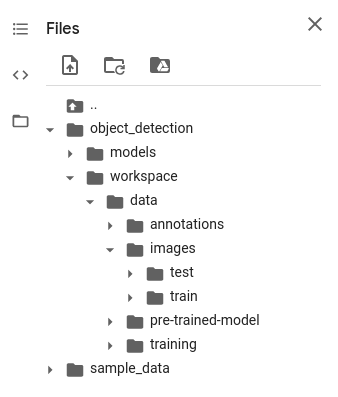

The workspace folders are now set.

## Dataset upload to the workspace.
You are provided with a small dataset containing about 100 images of diseased leaves of passion fruits under the folder.
- Upload the zipped file to the work environment.
- Unzip the file, you should get a new folder named `dataset` with a subfolder `images` and a file `labels.json`.

In [ ]:
# 1. The dataset is uploaded to the content directory, to unzip it, we have two 
#    options, either to move back in the directory tree or use the full path.
# We shall use the full path in this notebook.
!unzip /content/dataset.zip

# This function, unzips the folder to your current directory, so it is important
# to always know, where you are in the directory tree.
# Use the !pwd command to find out.

The dataset folder structure is as defined below;
```
dataset
├─ labels.json
└─ images
```
---
-`images` folder contains the image files.
- `labels.json` contains the labels for each image in the COCO label format.

## Converting to TFRecords.
Finally, for this notebook, we shall convert the dataset to TFRecords. This is quite a process with lots of steps. The steps are listed below: <br>
**Steps:**
1. Install `protobufs` software libraries. _(More about protobufs will be explained [shortly](#protobufs))._
2. Define helper functions.
3. Split the dataset into the test and train set.
4. Create the respective labels.csv for the test and train set.
5. Move files to the respective prepared directories.
6. Generate TFRecords from the datasets.


<a name="protobufs"></a>
### 1. Install `protobufs` software libraries.
Tensorflow Object Detection API uses Protobufs to configure model and training parameters. The Protobuf libraries must be installed to use the framework.

Notes on Protobufs:


---

*Protobufs*, or a serialized protocol buffer is a portable, extensible and efficient binary format developed by Google. Protobufs are defined by a simple language format (similar in syntax to a `C/C++ struct`) as defined below:
```
syntax: "proto3"
message Person {
  string name: 1;
  int32 id: 2;
  repeated string email:3;
}
```
This definition specifies the use of version 3 of `protobuf`, and specifies the each `Person` object may optionally have a `name` of type `string`, an `id` of `int32` and an `email` of type `string`. The numbers 1 to 3 are field identifiers used in each records binary representation. This definition can be saved in `.proto` file and compiled.

## Tensorflow Protobufs
Tensorflow primarily uses the `Example` protobuf, which represents a single instance in a dataset. It contains a list of named features, with each feature being either a list of byte strings, a list of floats, or a list of floats. An example is shown below:
```
syntax = "proto3";
message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
  oneof kind {
    BytesList bytes_list = 1;
    FloatList float_list = 2;
    Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
```
`[packed = true]` is used for repeated numerical fields to enusre efficient encoding.

---

Further reading:
1. [https://homl.info/protobuf](https://homl.info/protobuf)
2. Chapter 13: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow by `Aurélien Géron`

In [ ]:
#@title [IMPORTANT] Run Cell To Install Protobufs {display-mode: "form"}
%%capture
%cd models/research;
!protoc object_detection/protos/*.proto --python_out=.;

pwd = os.getcwd();

# Add TF_slim to the system path.
os.environ['PYTHONPATH'] += f':{pwd}:{pwd}/slim';

# Move back to the content/object_detection folder
%cd ../../

### 3. Define helper functions.
Helper functions are useful to perform data preparation tasks including splitting data, changing data from one format to another, visualizing the data among other functions.
***
Functions defined below:
1. `split_files(file_names,train=0.8, test=0.2, validate=0.0)`: splits a list of file names into lists of test and train file names.
2. `json_to_csv(file_names, images_dir, labels_path, annotations_dir, label_file_name)`: converts the labels.json into a .csv file.
3. `create_pbtxt(annotations_dir)`: creates the label map file.
4. `create_tfrecord(labels_file, images_dir, annotations_dir)`: creates TFRecords for the dataset.
    

In [ ]:
#@title [IMPORTANT] Run Cell To Intialize Helper Functions. {display-mode: "form"}
import json
import os
import glob
import io
import xml.etree.ElementTree as ET
import argparse
from pathlib import Path
import numpy as np
from shutil import copyfile
import csv
import pandas as pd
from PIL import Image
from tqdm import tqdm
import tensorflow.compat.v1 as tf
from object_detection.utils import dataset_util
from collections import namedtuple

def split_indices(x, train=0.8, test=0.0, validate=0.2, shuffle=True):
    """
      Returns the indices at which the data is split.
    """
    # split training data
    n = len(x)
    v = np.arange(n)
    if shuffle:
        np.random.shuffle(v)

    i = round(n * train)  # train
    j = round(n * test) + i  # test
    k = round(n * validate) + j  # validate
    return v[:i], v[i:j], v[j:k]  # return indices

def split_files(file_names,train=0.8, test=0.2, validate=0.0):
    """
      Split the files provided according to the specified distributions.

      file_names  this is a list of file names that are split.
      train       the distribution for the train files, 0 <= x <= 1
      test        the distribution for the test files, it should complement train to add to one.
                  i.e. if train is 0.8, test should be 0.2 such that 0.8 + 0.2 = 1.0
      validate    this is the distribution for the validation set, it should also 
                  complement the train and test values i.e if train is 0.8, test is 0.1, validate
                  should be 0.1 such that 0.8 + 0.1 + 0.1 = 1.0

      Returns:
        (tuple) train, test, val
                train   a list containing the file names of the train set
                test    a list containing the file names of the test set
                val     a list containing the file name of the validation set
    """
    # split training data
    file_name = list(filter(lambda x: len(x) > 0, file_names))
    file_name = sorted(file_name)
    i, j, k = split_indices(file_names, train=train, test=test, validate=validate)
    train = []
    test = []
    val = []
    datasets = {'train': i, 'test': j, 'val': k}
    for key, item in datasets.items():
        if item.any():
            for ix in item:
                if key == 'train':
                    train.append(file_names[ix])
                if key == 'test':
                    test.append(file_names[ix])
                if key == 'val':
                    val.append(file_names[ix])

    return train, test, val

def json_to_csv(file_names, images_dir, labels_path, annotations_dir, label_file_name):
  """
  Converts a JSON file to a csv file.

  file_names       list of file names.
  images_dir       path to the images directory
  labels_path      is the path to the labels JSON file.
  annotations_dir  is the directory in which the annotations will be stored.
  label_file_name  is the name of the output .csv file i.e. labels_train.csv
  """
  # Load coco file
  f = open(labels_path, 'r')
  COCO_DATA = json.load(f)
  f.close()

  images = COCO_DATA["images"]
  annotations = COCO_DATA["annotations"]
      
  # Generating the csv in the annotations folder under data directory. (Ideally)
  csv_file_name = os.path.join(str(annotations_dir), label_file_name)

  class_name = 'brownspot' # Normally, there will be more than one class, extract accordingly.

  with open(csv_file_name, 'w') as csv_label_file:
    f = csv.writer(csv_label_file)
    f.writerow(['file_name', 'width', 'height', 'class', 'xmin', 'ymin', 
                'xmax', 'ymax'])

    for file_name in tqdm(file_names, desc = "Images"):
        id = None
        for image in images:
          if file_name == image['file_name']:
            id = image['id']

        im = Image.open(os.path.join(images_dir, file_name))
        width, height = im.size

        for annotation in annotations:
            if id == annotation['image_id']:
                bbox = annotation['bbox']

                # COCO bbox label format: [xmin, ymin, width, height]
                xmin = bbox[0]
                xmax = bbox[0] + bbox[2]
                ymin = bbox[1]
                ymax = bbox[1] + bbox[3]

                # Write to .csv file.
                f.writerow([file_name, width, height, class_name, xmin, ymin, xmax, ymax])  

def create_pbtxt(annotations_dir):
  """
    Creates a pbtxt file.

    TensorFlow requires a label map, which maps each of the used labels 
    to an integer values. This label map is used both by the training and detection 
    processes. Notice the labels are one-indexed i.e. start at 1 (one).

    Example:
    # example.pbtxt
    item {
      id: 1
      name: 'cat'
    }

    item {
      id: 2
      name: 'dog'
    }

    The file is stored under the annotations folder.
  """
  # Create the label map
  label_map_path = os.path.join(annotations_dir, "label_map.pbtxt")
  pbtxt_content = ""

  class_name = 'brownspot' # Could be more than one class name.

  pbtxt_content = (
      pbtxt_content
      + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(1, class_name)
  )
  pbtxt_content = pbtxt_content.strip()
  with open(label_map_path, "w") as f:
      f.write(pbtxt_content)

def move_files(files, source, dest):
  """Move files from the source directory to the destination directory."""
  for filename in files:
    copyfile(os.path.join(source, filename),
                 os.path.join(dest, filename))
    
def class_text_to_int(row_label):
  if row_label == 'brownspot': # the respective class_name
    return 1
  else:
    None

def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

def create_tfrecord(labels_file, images_dir, annotations_dir):
  """
    Create a tfrecord from the .csv file.
  """
  csv_name = labels_file.split('/')[-1][:-4]
  writer = tf.io.TFRecordWriter(os.path.join(annotations_dir, csv_name + '.record'))
  path = os.path.join(images_dir)
  examples = pd.read_csv(labels_file)
  grouped = split(examples, 'file_name')
  for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())
  writer.close()
  print('Successfully created the TFRecords: {}'.format(csv_name + '.record'))

### 2. Split the dataset into the test and train set.
For any machine learning task, it is important to set split a dataset into a test and train set, the train set is used to train the model and the test set is used to test the model.

In [ ]:
# 1. Get the list of the files in the images directory.
files = os.listdir('/content/object_detection/dataset/images')

In [ ]:
# [TODO]
# 2. Split the dataset into the test and train using the split_files function

# Hint:
# Run split_files? to understand how the function works and what it returns.

In [ ]:
# [TODO]
# Check that the train and test sets are split according to your selected 
# distributions.

### 4. Create the respective labels.csv for the test and train set.
Here, we call the `json_to_csv` function to convert the labels from `.json` file format to `.csv` format. Under this section, we shall also create the `.pbtxt` label map, a label map is simply a file that maps an integer id to name, say if we have two classes, dog and cat, then we can map cat to '1' and dog to '2' as below.
```
item {
  id: 1
  name: 'cat'
}

item {
  id: 2
  name: 'dog'
}
```

In [ ]:
# train_labels.csv
# 1. Initialize the variable arguments for the conversion function.
images_dir = r'/content/object_detection/dataset/images'
annotations_dir = r'/content/object_detection/workspace/data/annotations'
labels_path = r'/content/object_detection/dataset/labels.json'
label_file_name = 'train_labels.csv'

# 2. Call the conversion function.
json_to_csv(train, images_dir, labels_path, annotations_dir, label_file_name)

In [ ]:
# [TODO]
# 3. Perform the conversion for the test set.

The `workspace\data\annotations` folder should now contain two files.
1. `train_labels.csv`
2. `test_labels.csv`

In [ ]:
# Finally, we create the pbtxt file.
create_pbtxt(annotations_dir)

The `workspace\data\annotations` should also contain the `label_map.pbtxt` file.

### 5. Move files to the respective prepared directories.
In this section, we move the image files from the `dataset` directory to the `images` directory that we created earlier under the `data` folder in the [Workspace Preparation Section.](#workspace-preparation)
***
Note:
- The train images are moved to the `images/train` subfolder, while the test images are moved to the `images\test` subfolder.

In [ ]:
# 1. First we move the train files.
source = r'/content/object_detection/dataset/images'
dest = r'/content/object_detection/workspace/data/images/train' # train subfolder
move_files(train, source, dest)

In [ ]:
# [TODO]
# 2. Move the test files from dataset/images to workspace/data/images/test

### 6. Generate TFRecords from the datasets.
In the final subsection, we shall create the TFRecords.

In [ ]:
# 1. Create the TFRecords for the train set.
labels_file = r'/content/object_detection/workspace/data/annotations/train_labels.csv'
train_dir = r'/content/object_detection/workspace/data/images/train' # Train image directory
create_tfrecord(labels_file, train_dir, annotations_dir)

In [ ]:
# [TODO]
# 2. Using the create_tfrecord function, create the TFRecords for the test set.

## Recap
In this notebook, we were able to;
1. Install the Tensorflow Object Detection API library.
2. Prepare our workspace, creating the different folders etc.
3. Upload our dataset to the workspace.
4. Convert our dataset and labels to TFRecords.

In the next notebook, we shall use the `.record` files to train an object detection model.